In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def convert_to_csv(input_file,output_file):
    # # Path to your input file
    epoch_number      = 200      #Enter epoch number you want to analyse
    length            = len(str(epoch_number))
    length_complement = 6 - length
    epoch_string      = length_complement*'0' + str(epoch_number)

    # Store data lines
    data = []

    with open(input_file, "r") as f:
        for line in f:
            # Skip empty lines and comment lines
            if line.strip() == "" or line.strip().startswith("#"):
                continue
            # Split based on any whitespace
            parts = line.strip().split()
            if len(parts) == 3:
                index, Eref, Ennp = parts
                data.append((int(index), float(Eref), float(Ennp)))

    # Create DataFrame and export
    df = pd.DataFrame(data, columns=["index", "Eref", "Ennp"])
    df.to_csv(output_file, index=False)

    print(f"Exported {len(df)} rows to {output_file}")
    return df

input_file = f'truncated_trainpoints.{epoch_string}.out'                 #Enter filename of epoch
output_file = f'truncated_trainpoints.{epoch_string}.csv'                
df_truncated_baseline = convert_to_csv(input_file,output_file)
df = convert_to_csv(input_file,output_file)

Exported 2124 rows to truncated_trainpoints.000200.csv
Exported 2424 rows to trainpoints.000200.csv


In [23]:
df

,index,Eref,Ennp
0,2,9.357667,9.487832
1,7,9.608153,9.531998
2,10,9.213571,9.306666
3,18,9.741672,9.789878
4,22,10.281484,10.223145
...,...,...,...
2419,2484,10.769207,10.449430
2420,2495,10.785204,10.450782
2421,2505,16.727883,16.874830
2422,2507,16.697884,16.655325


In [24]:
for f in [df,df_truncated_baseline]:
    f['abs(Ediff)'] = abs(f['Eref'] - f['Ennp'])
    f['abs(Ediff),%'] = abs(f['abs(Ediff)']/f['Eref'])*100

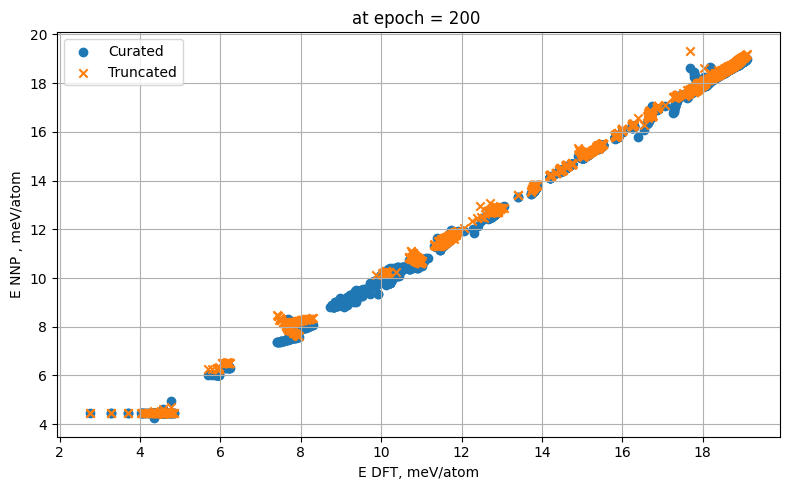

In [25]:
# Plot: Eref and Ennp vs. index
plt.figure(figsize=(8, 5))
plt.scatter(df["Eref"], df["Ennp"], label="Expanded", marker='o')
plt.scatter(df_truncated_baseline["Eref"], df_truncated_baseline["Ennp"], label="Truncated", marker='x')

# Labels and legend
plt.xlabel("E DFT, meV/atom")
plt.ylabel("E NNP , meV/atom")
plt.title("at epoch = 200 ")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show or save
# plt.savefig("energy_comparison_plot+10.png", dpi=300)
plt.show()

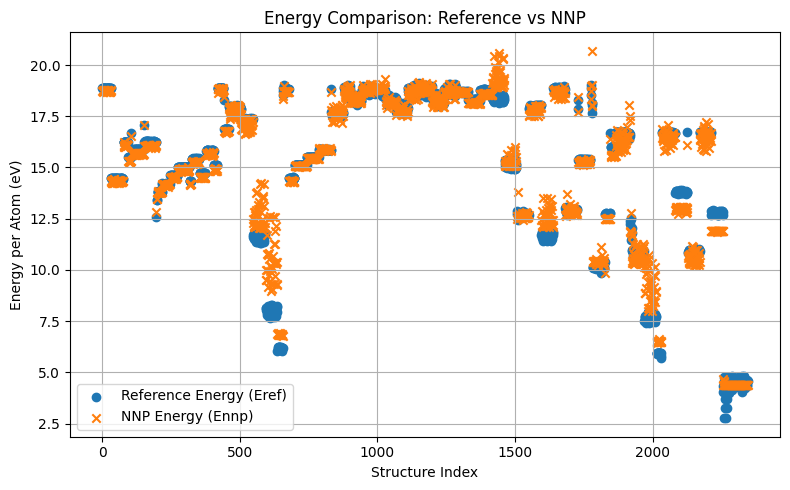

In [19]:
# Plot: Eref and Ennp vs. index
plt.figure(figsize=(8, 5))
plt.scatter(df_truncated_baseline["index"], df_truncated_baseline["Eref"], label="Reference Energy (Eref)", marker='o')
plt.scatter(df_truncated_baseline["index"], df_truncated_baseline["Ennp"], label="NNP Energy (Ennp)", marker='x')

# Labels and legend
plt.xlabel("Structure Index")
plt.ylabel("Energy per Atom (eV)")
plt.title("Energy Comparison: Reference vs NNP")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show or save
# plt.savefig("energy_comparison_plot_10.png", dpi=300)
plt.show()

In [20]:
df[:-50]

,index,Eref,Ennp,abs(Ediff),"abs(Ediff),%"
0,2,9.357667,9.641485,0.283818,3.033002
1,7,9.608153,9.684357,0.076204,0.793116
2,10,9.213571,9.499742,0.286171,3.105967
3,18,9.741672,10.004945,0.263273,2.702542
4,22,10.281484,10.641872,0.360388,3.505216
...,...,...,...,...,...
2369,2027,12.903079,12.675563,0.227516,1.763265
2370,2043,12.957775,12.708813,0.248962,1.921335
2371,2045,12.826727,12.656773,0.169954,1.325003
2372,2047,12.963937,12.716862,0.247076,1.905869


In [21]:
df_truncated_baseline[:-50]

,index,Eref,Ennp,abs(Ediff),"abs(Ediff),%"
0,2,18.858755,18.752592,0.106163,0.562937
1,7,18.877467,18.766685,0.110782,0.586845
2,22,18.873121,18.720556,0.152565,0.808373
3,26,18.858873,18.746787,0.112085,0.594338
4,41,14.470817,14.239159,0.231658,1.600863
...,...,...,...,...,...
2069,1770,15.366201,15.259850,0.106351,0.692113
2070,1783,10.122182,10.391885,0.269703,2.664474
2071,1786,10.112376,10.430480,0.318104,3.145693
2072,1792,10.121167,10.401866,0.280699,2.773385


In [22]:
len(df_truncated_baseline['abs(Ediff)']) , len(df)

(2124, 2424)

In [23]:
df_truncated_baseline['abs(Ediff)'][:10]

0    0.106163
1    0.110782
2    0.152565
3    0.112085
4    0.231658
5    0.039075
6    0.110442
7    0.185218
8    0.233992
9    0.132190
Name: abs(Ediff), dtype: float64

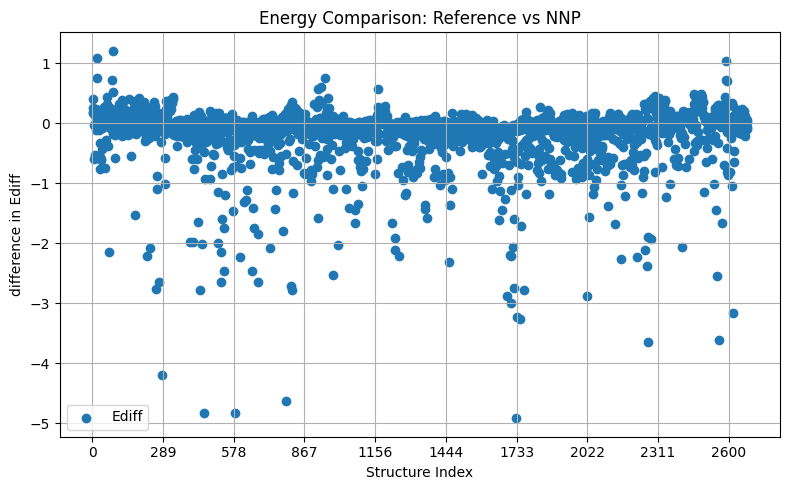

In [24]:
import numpy as np 
# Plot: Eref and Ennp vs. index
plt.figure(figsize=(8, 5))
plt.scatter(df["index"], df['abs(Ediff)']-df_truncated_baseline['abs(Ediff)'], label="Ediff", marker='o')


# Labels and legend
plt.xlabel("Structure Index")
plt.ylabel("difference in Ediff")
plt.xticks(np.linspace(0,2600,10))
# plt.yticks(np.linspace(0,70,15))
plt.title("Energy Comparison: Reference vs NNP")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show or save
# plt.savefig("energy_comparison_plot.png", dpi=300)
plt.show()

In [25]:
df.loc[df['abs(Ediff),%'] > 3 ]

,index,Eref,Ennp,abs(Ediff),"abs(Ediff),%"
0,2,9.357667,9.641485,0.283818,3.033002
2,10,9.213571,9.499742,0.286171,3.105967
4,22,10.281484,10.641872,0.360388,3.505216
8,44,9.208155,9.486423,0.278268,3.021973
10,78,8.808113,9.090600,0.282487,3.207125
...,...,...,...,...,...
2401,2323,7.665814,7.333734,0.332080,4.331959
2417,2462,10.975131,10.484203,0.490928,4.473092
2418,2479,10.907527,10.417252,0.490275,4.494835
2419,2484,10.769207,10.325242,0.443965,4.122541


In [26]:
11/1000

0.011